# Предварительный анализ данных Hi-C

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [ ]:
%%bash 
pip install cooler
pip install hicrep


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cooler-0.9.1-py2.py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 10.8 MB/s eta 0:00:00
  Using cached asciitree-0.3.3-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 66.4 MB/s eta 0:00:00
  Using cached pyfaidx-0.7.2.1-py3-none-any.whl (28 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 48.7 MB/s eta 0:00:00
  Using cached multiprocess-0.70.14-py310-none-any.whl (134 kB)
  Using cached cytoolz-0.12.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached simplejson-3.19.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (137 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cooler

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

We have replicates for 2 drosophila cell lines: Bg3 and Kc167.

Bg3 - nervous cell line (HiC1...., HiC2... files)

Kc167 - embryonic cell line (HiC3...., HiC4... files)

### Построение графика скейлинга для одного из образцов в логарифмических координатах (сделать корректные подписи, включая единицы измерений)

In [ ]:
mcool_1 ='drive/MyDrive/HSE/Minor/HiC1.dm3.mapq_30.1000.mcool'

In [ ]:
resolution = 20000
clr_1 = cooler.Cooler(f'{mcool_1}::resolutions/{resolution}')

In [ ]:
clr_1.chromnames

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']

In [ ]:
m_1=clr_1.matrix(balance=True).fetch('chrX')
m_2=clr_1.matrix(balance=True).fetch('chr2L')
m_3=clr_1.matrix(balance=True).fetch('chr2R')
m_4=clr_1.matrix(balance=True).fetch('chr3L')
m_5=clr_1.matrix(balance=True).fetch('chr3R')
m_6=clr_1.matrix(balance=True).fetch('chr4')

1. Примеры для одной хромосомы.

chrX

In [ ]:
##Считаем среднее по диагонали, повторяем для всех диагоналей
z_1=np.zeros(len(m_1))
for i in range(len(m_1)):
  z_1[i]=np.nanmean(np.diagonal(m_1,i))

<ipython-input-45-f0340d81560e>:4: RuntimeWarning: Mean of empty slice
  z_1[i]=np.nanmean(np.diagonal(m_1,i))


<ipython-input-46-59448c8b9634>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_1))*20000,np.log(z_1))


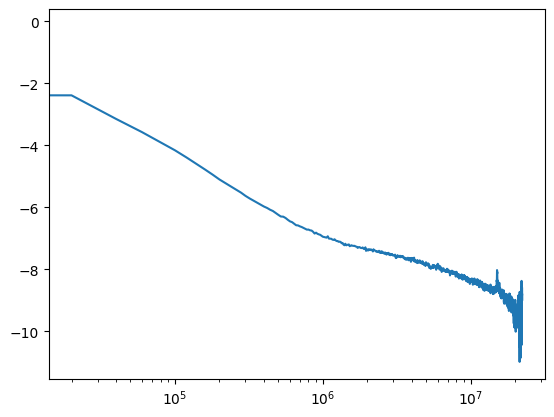

In [ ]:
##По оси X задаётся расстояние между участками в bp
##по оси Y - частота контакта в логарифмических координатах
##Мы умножаем на 20000, так как ранее использовали разрешение 20000, т.е. для перевода из бинов в расстояния
plt.plot(np.arange(len(m_1))*20000,np.log(z_1))
plt.xscale('log')

chr2L

In [ ]:
z_2=np.zeros(len(m_2))
for i in range(len(m_2)):
  z_2[i]=np.nanmean(np.diagonal(m_2,i))

<ipython-input-47-92102246713a>:4: RuntimeWarning: Mean of empty slice
  z_2[i]=np.nanmean(np.diagonal(m_2,i))


<ipython-input-49-faab014e0da2>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_2))*20000,np.log(z_2))


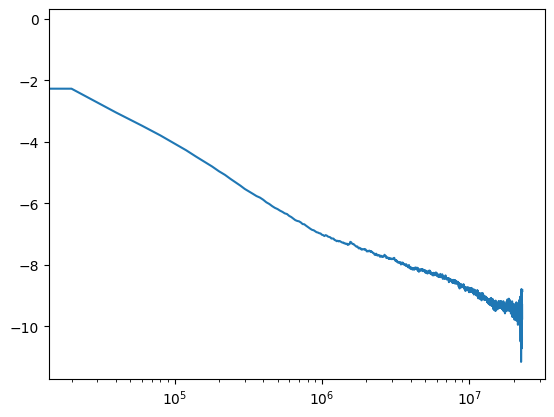

In [ ]:
plt.plot(np.arange(len(m_2))*20000,np.log(z_2))
plt.xscale('log')

chr2R

In [ ]:
z_3=np.zeros(len(m_3))
for i in range(len(m_3)):
  z_3[i]=np.nanmean(np.diagonal(m_3,i))

<ipython-input-50-569e827042ba>:4: RuntimeWarning: Mean of empty slice
  z_3[i]=np.nanmean(np.diagonal(m_3,i))


<ipython-input-51-80bfc2f98a94>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_3))*20000,np.log(z_3))


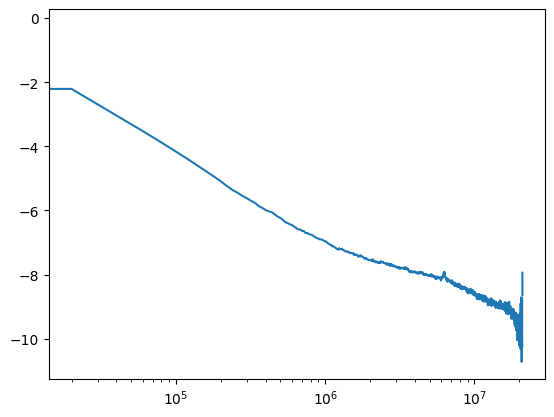

In [ ]:
plt.plot(np.arange(len(m_3))*20000,np.log(z_3))
plt.xscale('log')

chr3L

In [ ]:
z_4=np.zeros(len(m_4))
for i in range(len(m_4)):
  z_4[i]=np.nanmean(np.diagonal(m_4,i))

<ipython-input-52-14bc66b6e33c>:4: RuntimeWarning: Mean of empty slice
  z_4[i]=np.nanmean(np.diagonal(m_4,i))


<ipython-input-53-92767a99c04a>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_4))*20000,np.log(z_4))


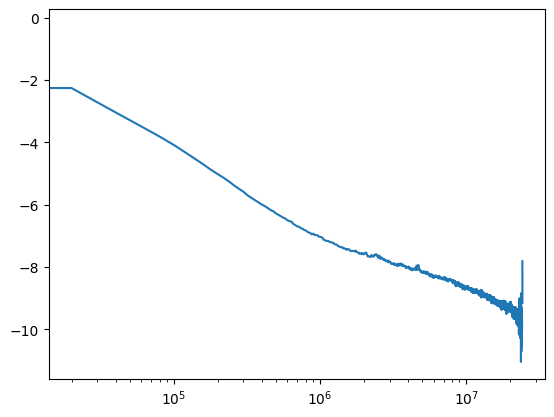

In [ ]:
plt.plot(np.arange(len(m_4))*20000,np.log(z_4))
plt.xscale('log')

chr3R

In [ ]:
z_5=np.zeros(len(m_5))
for i in range(len(m_5)):
  z_5[i]=np.nanmean(np.diagonal(m_5,i))

<ipython-input-54-30bd67637aec>:4: RuntimeWarning: Mean of empty slice
  z_5[i]=np.nanmean(np.diagonal(m_5,i))


<ipython-input-55-7e8549904e48>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_5))*20000,np.log(z_5))


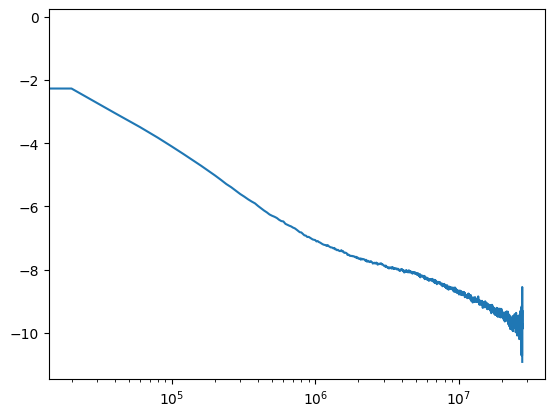

In [ ]:
plt.plot(np.arange(len(m_5))*20000,np.log(z_5))
plt.xscale('log')

chr4

In [ ]:
z_6=np.zeros(len(m_6))
for i in range(len(m_6)):
  z_6[i]=np.nanmean(np.diagonal(m_6,i))

<ipython-input-56-bdedfc31898d>:4: RuntimeWarning: Mean of empty slice
  z_6[i]=np.nanmean(np.diagonal(m_6,i))


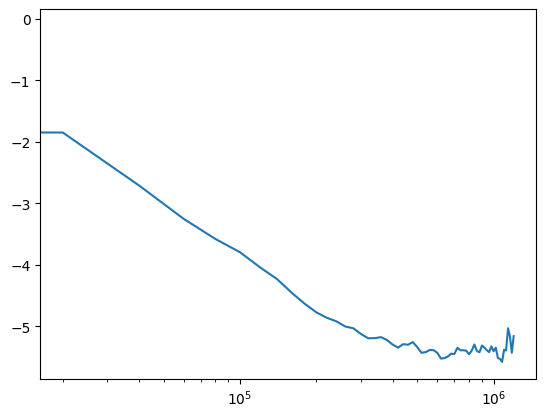

In [ ]:
plt.plot(np.arange(len(m_6))*20000,np.log(z_6))
plt.xscale('log')

2. Пример со средними значениями по хромосомам.

In [ ]:
m_common = []
for l in range(max(m_1.shape[1], m_2.shape[1], m_3.shape[1], m_4.shape[1], m_5.shape[1], m_6.shape[1])):
  m_common.append([])
  for n in range(max(m_1.shape[1], m_2.shape[1], m_3.shape[1], m_4.shape[1], m_5.shape[1], m_6.shape[1])):
    mean_contact = []
    for m in [m_1, m_2, m_3, m_4, m_5, m_6]:
      if (l < m.shape[1]) and (n < m.shape[1]):
        mean_contact.append(m[l][n])
    mc = np.nanmean(mean_contact)
    print(mc)
    m_common[l].append(mc)

2.7703766499223894
0.09405356269259703
0.08331695280824505
0.02598427523475555
0.01536827962127477
0.01226421370751759
0.009829450898630413
0.0078002777604116525
0.006050679468924734
0.006223059029054578
0.004805633612629601
0.003946591345686326
0.0031224177899683283
0.003591281287491737
0.0031941684703199274
0.0024006651547588383
0.0021441652756198767
0.0027310693851245295
0.003060865176681393
0.003040798561935671
0.0027314006295253218
0.002836763635221338
0.002842480601303832
0.0022007907562745376
0.0019397372853346645
0.002132550101762728
0.0017321874026410508
0.002963850084981499
0.0019322313028603062
0.0037418761632613444
0.002483716980299576
0.0014807266465690853
0.0013237335999732869
0.001140589923890263
0.0008806781696081055
0.0015169449557672508
0.0006926687928231834
0.0012653424097377583
0.0017439712591308925
0.0008861814938884902
0.0008480499428409194
0.002044219760806301
0.0016864012452705854
0.0011949921416077943
0.0010950886006474503
0.0004685231738810443
0.00078132969974

<ipython-input-41-459035ca8edb>:9: RuntimeWarning: Mean of empty slice
  mc = np.nanmean(mean_contact)


Выходные данные были обрезаны до нескольких последних строк (5000).
0.0
0.0
0.0
0.0
0.0
0.0001623454070192328
0.0
0.00029603610166789726
0.0
0.0001603707432814135
0.0003006334478698651
0.00016251760963445467
0.0003216091614621154
0.0002036939594032915
0.0002154792322841366
0.0
0.0002178959866961739
0.0001792533337272183
0.0
0.00048650163303194075
0.0
0.00031752169302817535
0.0
0.00019176529050572166
0.0
0.00017627822873502567
0.0
0.0
0.0001929329369243328
0.00016888917343281477
0.0
0.00016936015093343377
0.0
0.0
0.0
0.0
0.0
0.00047213795597452797
0.0003341976595472202
0.00015322506057492328
0.00025769122921788463
0.0
0.0
0.0001822222629787242
0.0002316662435008945
0.0
0.0
0.0
0.00039990011737226297
0.0005044450249491321
0.0002287708998989689
0.0
0.0
0.0002506034143098933
0.00016450699489270883
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0002586873929578244
0.0002493081217036272
0.00021651206002341774
0.0
0.000428645821781386
0.0002904689575351638
0.00035561468028954814
0.

In [ ]:
##Считаем среднее по диагонали, повторяем для всех диагоналей
z=np.zeros(len(m_common))
for i in range(len(m_common)):
  z[i]=np.nanmean(np.diagonal(m_common,i))

<ipython-input-43-aa68a2d027fa>:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m_common,i))


<ipython-input-44-2cf45d1c7e36>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_common))*20000,np.log(z))


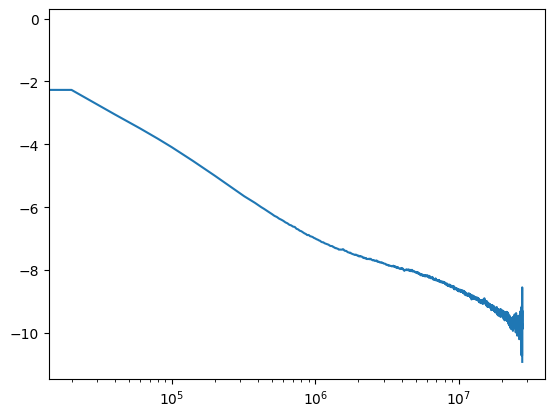

In [ ]:
##По оси X задаётся расстояние между участками в bp
##по оси Y - частота контакта в логарифмических координатах
##Мы умножаем на 20000, так как ранее использовали разрешение 20000, т.е. для перевода из бинов в расстояния
plt.plot(np.arange(len(m_common))*20000,np.log(z))
plt.xscale('log')

**Графики скейлинга позволяют сделать вывод, что расположенные ближе области хроматина взаимодействуют между собой чаще отдаленных, т.е. корреляцию между дистанцией и логарифмом частоты взаимодействия можно аппроксимировать линейно.**

### Построение дендрограммы реплик  Hi-C для клеточных линий дрозофилы bg3 (нервная ткань) и kc167 (эмбриональная линия) на основе коэффициента SCC

In [ ]:
### the code is for calculation of scc between HiC1.dm3.mapq_30.1000.mcool and HiC2.dm3.mapq_30.1000.mcool
##binSize - это разрешение, которое будет использовано при работе с файлом
##dBPMax - это максимальное расстояние между участками генома, для которых считается коэффициент корреляции
##bDownSample выравнивает реплики до одинакового суммарного количества контактов
##h определяет сглаживание, при 0 сглаживания нет

binSize = 20000 
dBPMax = 5000000 
bDownSample = True
h=0

scc = []
for i in range (1,5):
  sub_scc = []
  for j in range (1,5):
    fmcool1 = f'drive/MyDrive/HSE/Minor/HiC{i}.dm3.mapq_30.1000.mcool'
    fmcool2 = f'drive/MyDrive/HSE/Minor/HiC{j}.dm3.mapq_30.1000.mcool'
    cool1, binSize1 = readMcool(fmcool1, binSize)
    cool2, binSize2 = readMcool(fmcool2, binSize)
    sub_scc.append(np.nanmean(hicrepSCC(cool1, cool2, h, dBPMax, bDownSample)))
  scc.append(sub_scc)

/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return 

In [ ]:
scc

[[0.9997391757955137,
  0.6723725186377095,
  0.42068282382994404,
  0.3905931684782005],
 [0.6723828732662783, 1.0, 0.42424751575594793, 0.3943016698053454],
 [0.41792878033010755,
  0.4251399993867173,
  0.9997442455242966,
  0.6549747172474569],
 [0.3920244636137924, 0.3953382253588211, 0.6548533991262159, 1.0]]

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.4509626802089949, 0.4509626802089949, 0.0],
  [0.0, 0.5054255999962198, 0.5054255999962198, 0.0],
  [0.4509626802089949,
   1.7251227263500364,
   1.7251227263500364,
   0.5054255999962198]],
 'ivl': ['bg3_rep1', 'bg3_rep2', 'kc167_rep3', 'kc167_rep4'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0']}

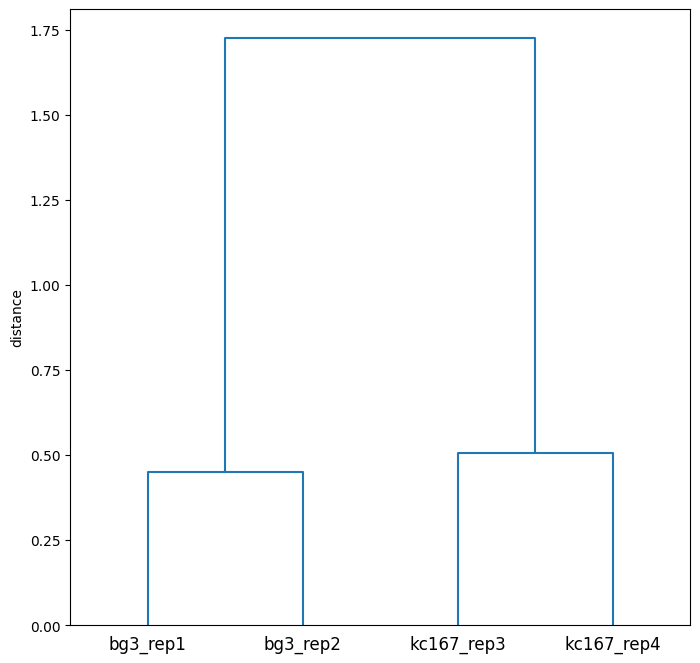

In [ ]:
Z=linkage(scc, 'single', 'correlation')
plt.figure(figsize=(8,8))
plt.ylabel('distance')

dendrogram(Z, color_threshold=0,labels=['bg3_rep1', 'bg3_rep2', 'kc167_rep3', 'kc167_rep4'])



**Дендрограмма позволяет сделать вывод, что реплики bg3 наиболее близки между собой, чуть менее близки между собой реплики kc167, дистанция между усреднёнными bg3 и kc167 в ~3 раза больше дистанции между репликами для клеточных линий.**

**Данная картина позволяет сделать вывод о сходстве между репликами и существенной разнице между картинами для разных клеточных линий.**